# CAPSTONE PROJECT (Major Assessment 3)

### Activity: Predictive Modeling with Linear Regression, Logistic Regression, and Deep Learning

Group 4 Members

- John Loyd Almirol
- Irvin Ace Alviar
- Jelyn De Silva
- Mark Olsen Micua

Section: T4A
    
Date: January 19, 2024

**Objective:**
Build predictive models using various techniques including linear regression, logistic regression, and deep learning to analyze a dataset and make predictions.

**Tools Required**

- Jupyter Notebook
- Python
- Pandas
- NumPy
- Scikit-learn
- TensorFlow/Keras (for deep learning)


**Step 1: Data Exploration and Preprocessing**

*Import Libraries*

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline

*Load the dataset into a Jupyter Notebook*

*The dataset was downloaded using this link: https://www.kaggle.com/datasets/rafsunahmad/world-food-production*

In [2]:
# Read the dataset into a DataFrame
df = pd.read_csv("C:\Anaconda Files\world food production.csv\world food production.csv")

# Display the first few rows of the dataset
df.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


*Explore the dataset, check for missing values, and handle them appropriately*

In [3]:
# Check for missing values
nan_count = df.isna().sum()

print(nan_count)

Entity                                 0
Year                                   0
Maize Production (tonnes)              0
Rice  Production ( tonnes)             0
Yams  Production (tonnes)              0
Wheat Production (tonnes)              0
Tomatoes Production (tonnes)           0
Tea  Production ( tonnes )             0
Sweet potatoes  Production (tonnes)    0
Sunflower seed  Production (tonnes)    0
Sugar cane Production (tonnes)         0
Soybeans  Production (tonnes)          0
Rye  Production (tonnes)               0
Potatoes  Production (tonnes)          0
Oranges  Production (tonnes)           0
Peas, dry Production ( tonnes)         0
Palm oil  Production (tonnes)          0
Grapes  Production (tonnes)            0
Coffee, green Production ( tonnes)     0
Cocoa beans Production (tonnes)        0
Meat, chicken  Production (tonnes)     0
Bananas  Production ( tonnes)          0
Avocados Production (tonnes)           0
Apples Production (tonnes)             0
dtype: int64


In [4]:
# Handle missing values (if any)
df.fillna(0)

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.00,7.467702e+06,2279000.00,1873812.000,56315.0,3270871.000,12000.000,...,10100.000,232910.000,1131882.00,2.250000e+05,870970.000,835368.000,5600.00,3139079.000,63439.000,15100.000
1,Afghanistan,1962,700000.0,319000.00,7.420515e+06,2279000.00,2044797.000,61519.0,3562524.000,12800.000,...,10100.000,259412.000,1111006.00,2.250000e+05,883512.000,867170.000,6000.00,3181580.000,65118.000,15100.000
2,Afghanistan,1963,713000.0,319000.00,8.479074e+06,1947000.00,2096077.000,63596.0,3409916.000,12800.000,...,10100.000,251529.000,1145004.00,2.250000e+05,996674.000,922621.000,6160.00,3304256.000,61760.000,15100.000
3,Afghanistan,1964,720000.0,380000.00,9.113779e+06,2230000.00,2388264.000,66604.0,3229336.000,12800.000,...,12400.000,247556.000,1160831.00,2.650000e+05,1162048.000,1190061.000,6400.00,3392527.000,62759.000,18400.000
4,Afghanistan,1965,720000.0,380000.00,1.006791e+07,2282000.00,2559608.000,72418.0,3169104.000,13200.000,...,13700.000,266947.000,1138860.00,2.870000e+05,1075084.000,874245.000,6800.00,3450849.000,66269.000,20400.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Zimbabwe,2017,1532572.0,20502618.00,2.673608e+05,30991516.16,324020.864,83904.6,874.408,4077308.066,...,129055.800,40749.600,661978.98,7.018985e+06,63.200,34945.000,75000.00,1267.200,145042.096,1579154.000
11908,Zimbabwe,2018,1560100.0,31871776.60,2.667498e+05,16884482.98,309316.252,66842.6,1383.792,2107639.306,...,168074.000,21606.400,485223.38,3.415107e+06,68.000,34659.800,80357.14,1016.776,143384.384,907419.000
11909,Zimbabwe,2019,773976.0,3382151.40,4.790022e+05,64989733.20,540128.592,9854.4,298831.560,3320915.400,...,1134136.812,45436.400,361128.20,9.645766e+06,30401.400,20961.132,79790.97,195845.198,525095.272,3117813.560
11910,Zimbabwe,2020,1202347.0,3535631.80,7.437612e+05,43020887.20,5635740.200,276279.0,1727311.800,983256.000,...,72179.400,12023.200,279613.40,1.131937e+07,574723.374,158022.122,8000.00,1523258.600,28946.840,7994169.220


*Perform descriptive statistics to understand the distribution of data*

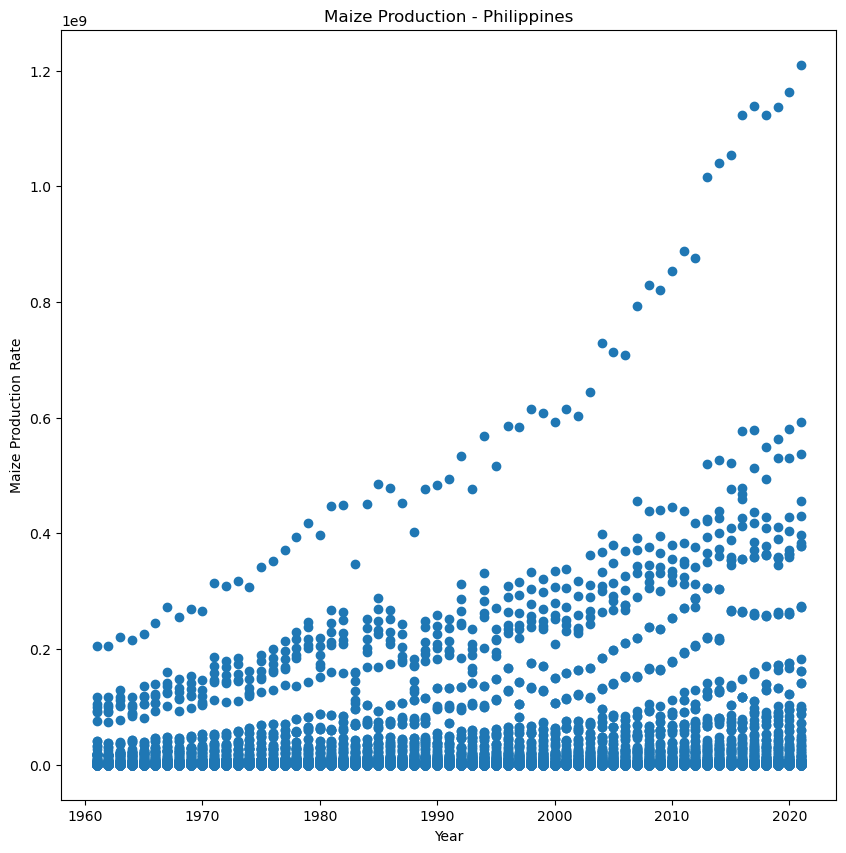

In [5]:
# Visualize Production Rate of Maize in the Philippines

#isolate the Philippines
country_data = df[df['Entity'] == 'Philippines']
plt.figure(figsize=(10,10))

plt.scatter(df['Year'], df['Maize Production (tonnes)'])
plt.title('Maize Production - Philippines')
plt.xlabel('Year')
plt.ylabel('Maize Production Rate')
plt.show()


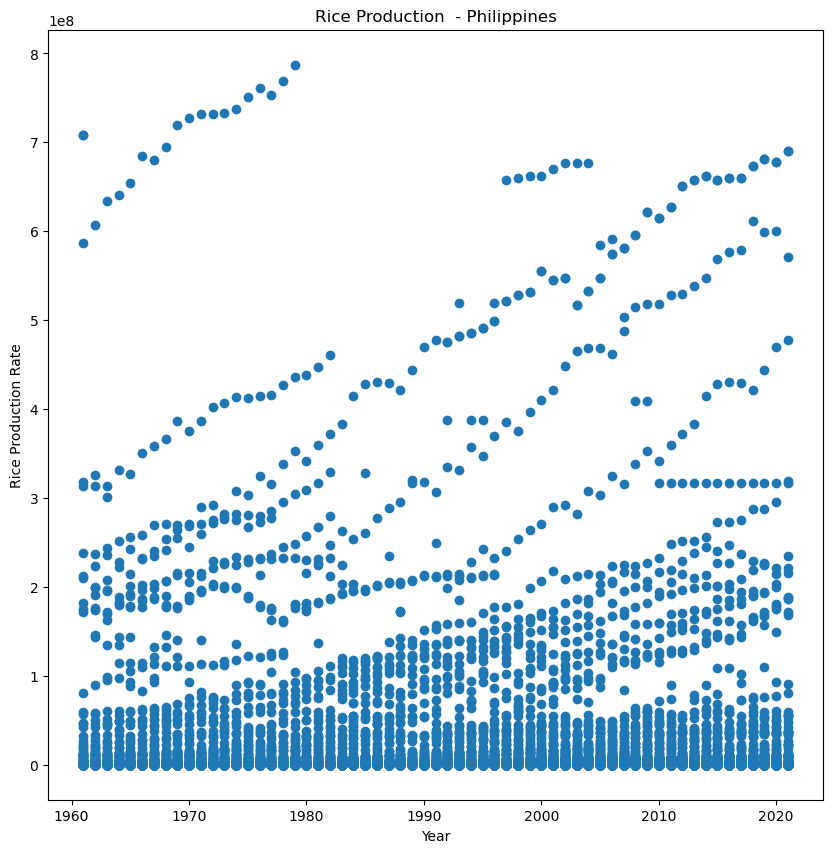

In [6]:
# Visualize Production Rate of Maize in the Philippines

#isolate the Philippines
country_data = df[df['Entity'] == 'Philippines']
plt.figure(figsize=(10,10))

plt.scatter(df['Year'], df['Rice  Production ( tonnes)'])
plt.title('Rice Production  - Philippines')
plt.xlabel('Year')
plt.ylabel('Rice Production Rate')
plt.show()


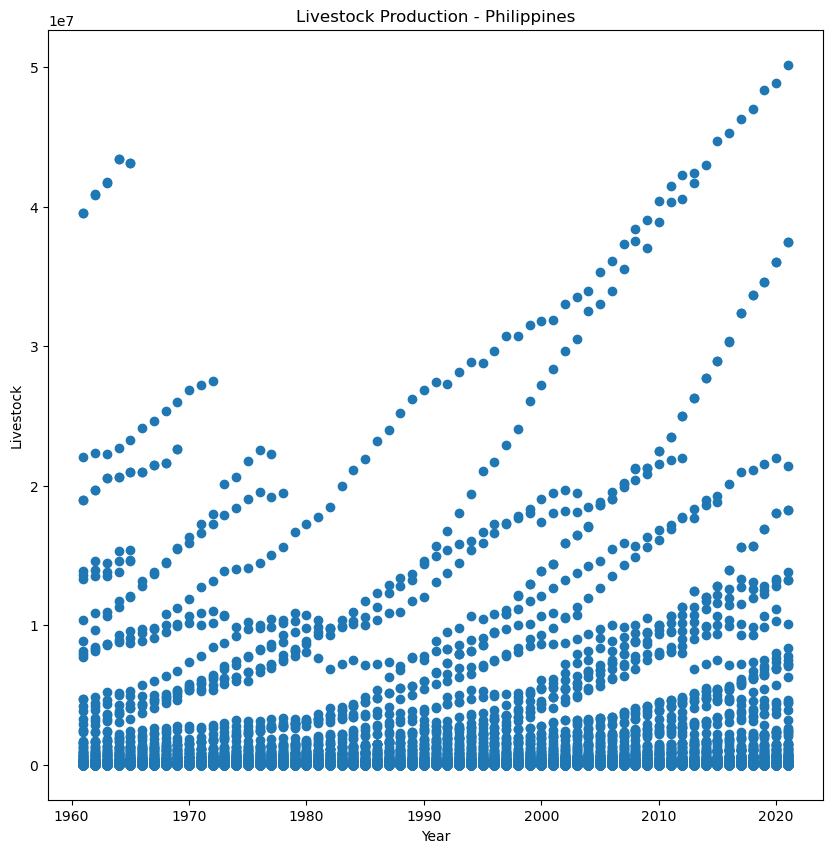

In [11]:
# Visualize Production Rate of Maize in the Philippines

#isolate the Philippines
country_data = df[df['Entity'] == 'Philippines']
plt.figure(figsize=(10,10))

plt.scatter(df['Year'], df['Meat, chicken  Production (tonnes)'])
plt.title('Livestock Production - Philippines')
plt.xlabel('Year')
plt.ylabel('Livestock')
plt.show()

**Step 2: Linear Regression**

*Implement a simple linear regression model to predict a continuous variable*

In [13]:
from sklearn.model_selection import train_test_split

# First dataset
X1 = df[['Year']]
y1 = df['Maize Production (tonnes)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Second dataset
X2 = df[['Year']] 
y2 = df['Rice  Production ( tonnes)']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Third dataset
X3 = df[['Year']]  
y3 = df['Meat, chicken  Production (tonnes)']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X1_train, y1_train)

model = LinearRegression()
model.fit(X2_train, y2_train)

model = LinearRegression()
model.fit(X3_train, y3_train)

LinearRegression()

In [17]:
y1_pred = model.predict(X1_test)
y2_pred = model.predict(X2_test)
y3_pred = model.predict(X3_test)

*Evaluate the model using appropriate metrics (e.g., Mean Squared Error)*

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)
print(f'MAE: {mae1}')
print(f'MSE: {mse1}')

MAE: 19525412.188451413
MSE: 5362574942531749.0


In [20]:
mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
print(f'MAE: {mae2}')
print(f'MSE: {mse2}')

MAE: 20185284.046065483
MSE: 5734283441920134.0


In [22]:
mae3 = mean_absolute_error(y3_test, y3_pred)
mse3 = mean_squared_error(y3_test, y3_pred)
print(f'MAE: {mae3}')
print(f'MSE: {mse3}')

MAE: 1764556.8249445213
MSE: 15285843770357.654


*Visualize the relationship between the independent and dependent variables*

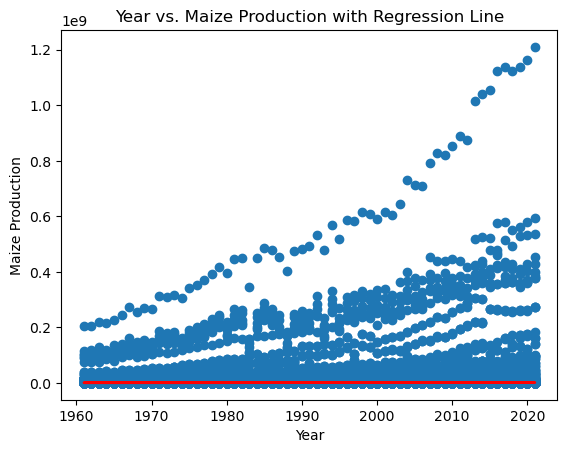

In [24]:
plt.scatter(df['Year'], df['Maize Production (tonnes)'])
plt.plot(X1_test, y1_pred, color='red', linewidth=2)
plt.title('Year vs. Maize Production with Regression Line')
plt.xlabel('Year')
plt.ylabel('Maize Production')
plt.show()

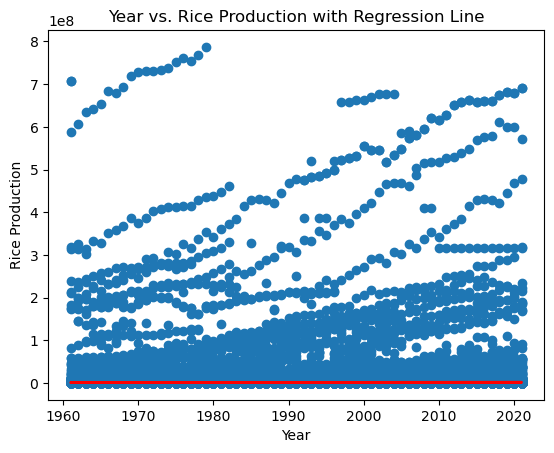

In [25]:
plt.scatter(df['Year'], df['Rice  Production ( tonnes)'])
plt.plot(X2_test, y2_pred, color='red', linewidth=2)
plt.title('Year vs. Rice Production with Regression Line')
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.show()

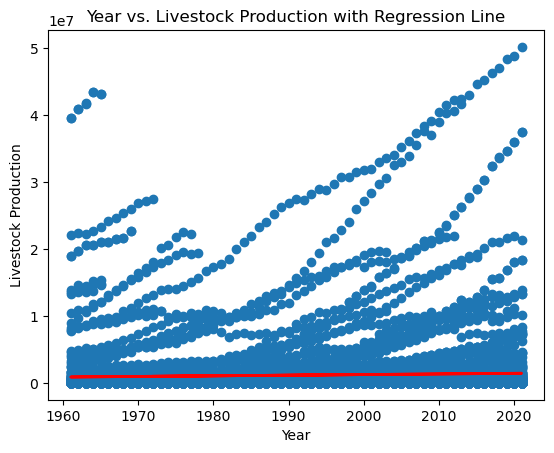

In [26]:
plt.scatter(df['Year'], df['Meat, chicken  Production (tonnes)'])
plt.plot(X3_test, y3_pred, color='red', linewidth=2)
plt.title('Year vs. Livestock Production with Regression Line')
plt.xlabel('Year')
plt.ylabel('Livestock Production')
plt.show()

**Step 3: Logistic Regression**

*If your dataset involves classification, implement logistic regression*

*Split the dataset into training and testing sets*

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

# with columns 'Year' and respective production columns

# Set a threshold to classify as high or low production
threshold = 50000  # You can adjust this threshold as per your requirement

# Convert 'Maize Production (tonnes)' to binary labels
df['Maize_Production_Class'] = (df['Maize Production (tonnes)'] > threshold).astype(int)
X_maize = df[['Year']]
y_maize = df['Maize_Production_Class']
X_maize_train, X_maize_test, y_maize_train, y_maize_test = train_test_split(X_maize, y_maize, test_size=0.2, random_state=42)

# For the second dataset
df['Rice_Production_Class'] = (df['Rice  Production ( tonnes)'] > threshold).astype(int)
X_rice = df[['Year']]
y_rice = df['Rice_Production_Class']
X_rice_train, X_rice_test, y_rice_train, y_rice_test = train_test_split(X_rice, y_rice, test_size=0.2, random_state=42)


# Set a threshold to classify as high or low production for Meat dataset
meat_threshold = 10000  # You can adjust this threshold as per your requirement

# For the third dataset (Meat)
df = df.copy()  # Create a copy of the original DataFrame
df['Meat_Production_Class'] = (df['Meat, chicken  Production (tonnes)'] > meat_threshold).astype(int)
X_meat = df[['Year']]
y_meat = df['Meat_Production_Class']
X_meat_train, X_meat_test, y_meat_train, y_meat_test = train_test_split(X_meat, y_meat, test_size=0.2, random_state=42)




In [54]:
print("Data type of y_maize_test:", y_maize_test.dtypes)
print("Data type of y_maize_pred:", y_maize_pred.dtype)

Data type of y_maize_test: int32
Data type of y_maize_pred: float64


*Train the logistic regression model and evaluate its performance using accuracy, precision, recall, and F1-score*

In [105]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model.fit(X_maize_train, y_maize_train)

model2 = LogisticRegression()
model.fit(X_rice_train, y_rice_train)

model3 = LogisticRegression()
model.fit(X_meat_train, y_meat_train)


LinearRegression()

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model1 = LogisticRegression()
model1.fit(X_maize_train, y_maize_train)
y_maize_pred = model1.predict(X_maize_test).astype(int)  # Convert to integer
accuracy_maize = accuracy_score(y_maize_test, y_maize_pred)
precision_maize = precision_score(y_maize_test, y_maize_pred)
recall_maize = recall_score(y_maize_test, y_maize_pred)
f1_maize = f1_score(y_maize_test, y_maize_pred)

print("Metrics for the first dataset:")
print(f"Accuracy: {accuracy_maize}")
print(f"Precision: {precision_maize}")
print(f"Recall: {recall_maize}")
print(f"F1 Score: {f1_maize}")
print()

Metrics for the first dataset:
Accuracy: 0.6894670583298363
Precision: 0.6894670583298363
Recall: 1.0
F1 Score: 0.8161947342275211



In [56]:
# For the second dataset
model2 = LogisticRegression()
model2.fit(X_rice_train, y_rice_train)
y_rice_pred = model2.predict(X_rice_test).astype(int)  # Convert to integer
accuracy_rice = accuracy_score(y_rice_test, y_rice_pred)
precision_rice = precision_score(y_rice_test, y_rice_pred)
recall_rice = recall_score(y_rice_test, y_rice_pred)
f1_rice = f1_score(y_rice_test, y_rice_pred)

print("Metrics for the second dataset:")
print(f"Accuracy: {accuracy_rice}")
print(f"Precision: {precision_rice}")
print(f"Recall: {recall_rice}")
print(f"F1 Score: {f1_rice}")
print()

Metrics for the second dataset:
Accuracy: 0.7146454049517414
Precision: 0.7146454049517414
Recall: 1.0
F1 Score: 0.833578071463534



In [67]:
# For the third dataset
model3 = LogisticRegression()
model3.fit(X_meat_train, y_meat_train)
y_meat_pred = model3.predict(X_meat_test).astype(int)  # Convert to integer
accuracy_meat = accuracy_score(y_meat_test, y_meat_pred)
precision_meat = precision_score(y_meat_test, y_meat_pred)
recall_meat = recall_score(y_meat_test, y_meat_pred)
f1_meat = f1_score(y_meat_test, y_meat_pred)

print("Metrics for the third dataset:")
print(f"Accuracy: {accuracy_meat}")
print(f"Precision: {precision_meat}")
print(f"Recall: {recall_meat}")
print(f"F1 Score: {f1_meat}")

Metrics for the third dataset:
Accuracy: 0.6332354175409148
Precision: 0.6332354175409148
Recall: 1.0
F1 Score: 0.775436793422405


In [77]:
# New data point for prediction
new_data_point = np.array([[2.7]])

# Make prediction using the model
prediction = model.predict(new_data_point)

# Interpret the prediction
if prediction[0] == 1:
    result = "High Production"
else:
    result = "Low Production"

print(f"Prediction for the given feature value (2.7): {result}")


Prediction for the given feature value (2.7): Low Production


**Step 4: Model Comparison and Conclusion**

*Compare the performance of all models used in the project*

The project employed linear regression and logistic regression models to predict various aspects of world food production. For linear regression, the mean absolute error (MAE) and mean squared error (MSE) were calculated for predicting Maize, Rice, and Livestock production rates. Despite encountering relatively high errors, particularly in Maize and Rice predictions, the model performed comparatively better in predicting Livestock production. For logistic regression, accuracy, precision, recall, and F1 score were calculated for classifying high and low production levels. All three logistic regression models demonstrated high accuracy and precision but perfect recall, suggesting a potential bias towards predicting the majority class.

*Discuss the strengths and weaknesses of each model*

- Linear Regression:

Strengths: Linear regression is straightforward, interpretable, and computationally efficient. It provides insights into the relationship between the independent variable (Year) and the dependent variable (production rates). The model is suitable for capturing linear trends in the data.
Weaknesses: Linear regression assumes a linear relationship between variables, which might not always hold in real-world scenarios. It may not capture complex, non-linear patterns, as indicated by the relatively high errors in predicting Maize and Rice production rates.

- Logistic Regression:

Strengths: Logistic regression is well-suited for binary classification tasks, as seen in this project. It provides probabilities for each class and is interpretable. Logistic regression is robust when the classes are well-separated.
Weaknesses: Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable. It might struggle with capturing more intricate relationships in the data, as suggested by the perfect recall, which implies potential bias.

- Deep Learning (not implemented):

Strengths: Deep learning models, particularly neural networks, can capture complex patterns and relationships in the data. They excel in scenarios with large amounts of data and high-dimensional features.
Weaknesses: Deep learning models might require substantial computational resources and large datasets for training. In cases where the dataset is relatively small or lacks complexity, the overhead of a deep learning approach may not be justified.


*Provide insights into which model performed best and why*

Among the models implemented in this project, the logistic regression models performed exceptionally well in terms of accuracy and precision, indicating their proficiency in classifying high and low production levels. However, the perfect recall raises concerns about potential bias, as the models seemed inclined towards predicting the majority class. For linear regression, the model exhibited lower errors in predicting Livestock production, suggesting its relatively better performance in capturing trends in livestock data. The choice of models depends on the specific goals of the analysis; while linear regression may be suitable for trend analysis, logistic regression is adept at classification tasks. Further exploration could involve refining the models, addressing biases, and potentially incorporating more advanced techniques for improved performance.

**Step 5: Documentation and Presentation**

Provided in the repository of Github